In [53]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

NUM_LABELS = 10
CLUSTER_CNT_K = 20

In [54]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train, X_test = X_train/255.0, X_test/255.0

X_train, X_test = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

train_x, train_y = [], []
for i in range(NUM_LABELS):
  temp_x = X_train[np.where(Y_train == i)[0]]
  np.random.shuffle(temp_x)
  train_x.extend(temp_x[:100])
  train_y += [i]*100

train_x, train_y = np.array(train_x), np.array(train_y)

indices = [i for i in range(len(train_x))]
np.random.shuffle(indices)
train_x, train_y = train_x[indices], train_y[indices]

indices = [i for i in range(len(X_test))]
np.random.shuffle(indices)
test_x, test_y = X_test[indices][:50], Y_test[indices][:50]

print(f"The number of data points (N) = {train_x.shape[0]}")
print(f"The size of each data point (n) = {train_x.shape[1]}")

The number of data points (N) = 1000
The size of each data point (n) = 784


In [55]:
class K_Means_Clustering():
  def __init__(self, data, labels, k_val, cluster_rep):
    self.data = data
    self.labels=labels
    self.k_val = k_val
    self.cluster_rep = cluster_rep
    self.len_data = self.data.shape[0]
    self.len_features = self.data.shape[1]
    self.cluster_assignment = np.zeros(self.len_data, dtype=int)
    self.cluster_label = -1*np.ones(self.k_val, dtype=int)
    self.cluster_cost = []

  def dist(self, val1, val2):
    return np.linalg.norm(val1-val2, 2)
  
  def update_assignment(self):
    for i in range(self.len_data):
      self.cluster_assignment[i] = np.argmin(np.array([self.dist(self.data[i], rep) for rep in self.cluster_rep]))
  
  def update_rep(self):
    for i in range(self.k_val):
      cluster_member = np.where(self.cluster_assignment == i)[0]
      if cluster_member.shape[0]:
        self.cluster_rep[i] = np.mean(self.data[cluster_member], axis = 0)
      else:
        self.cluster_rep[i] = np.zeros(self.len_features)

  def update_label(self):
    for i in range(self.k_val):
      cluster_member = np.where(self.cluster_assignment == i)[0]
      if cluster_member.shape[0]:
        self.cluster_label[i] = np.argmax(np.bincount(self.labels[cluster_member]))
      else:
        self.cluster_label[i] = -1;
    
  def avg_cost_clusters(self):
    cost_clusters = [self.dist(self.data[i], self.cluster_rep[self.cluster_assignment[i]]) for i in range(self.len_data)]
    return np.mean(np.array(cost_clusters))
  
  def convergence(self):
    return np.absolute(self.cluster_cost[-1] - self.cluster_cost[-2]) < 1e-6
  
  def train_dataset(self, iter_max=100, details=True):
    for i in range(iter_max):
      self.update_assignment()
      self.update_rep()
      self.update_label()
      self.cluster_cost.append(self.avg_cost_clusters())
      if i>1 and self.convergence():
        if details:
          print(f"Converged after {i+1} iterations.")
        return self.cluster_cost[-1]
    
    print("Max iterations reached")
    return self.cluster_cost[-1]

  def test_model(self, test_x, test_y):
    clusters_pred = [np.argmin(np.array([self.dist(x, rep) for rep in self.cluster_rep])) for x in test_x]
    labels_pred = self.cluster_label[np.array(clusters_pred)]
    return np.sum(labels_pred == test_y) / float(len(test_y))
  
  def plot_representatives(self):
    reps = self.cluster_rep.reshape((self.k_val, 28, 28))
    window, axis = plt.subplots(5, 4, figsize=(14,14))
    window.suptitle("Cluster - Representatives", fontsize=25)

    for itr, pos in enumerate(axis.flat):
      pos.axis('off')
      pos.matshow(reps[itr])
      pos.text(-2.0, -2.0, f"Value = {self.cluster_label[itr]}")
    
    plt.gray()
    plt.show()

  def plot_costs(self):
    plt.plot(range(len(self.cluster_cost)), np.array(self.cluster_cost))
    plt.xlabel("Iterations")
    plt.ylabel("Cost Cluster")
    plt.show()

CHOOSING INITIAL REPRESENTATIVES AS RANDOM POINTS --> 


------------- Part A ----------------

Converged after 31 iterations.


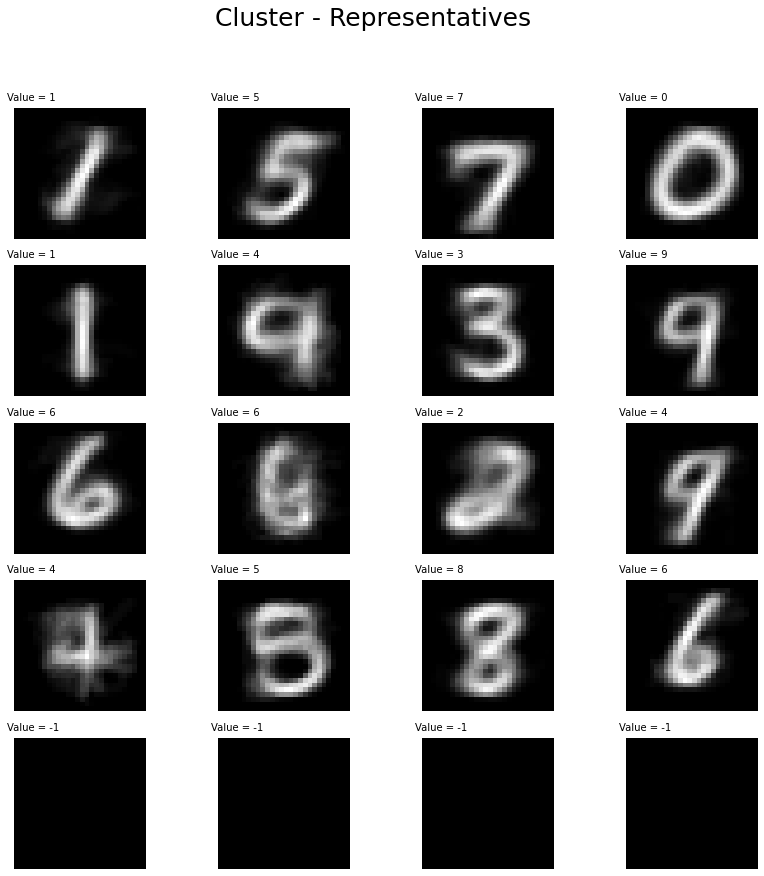


------------- Part B----------------

Accuracy of the model is: 0.66



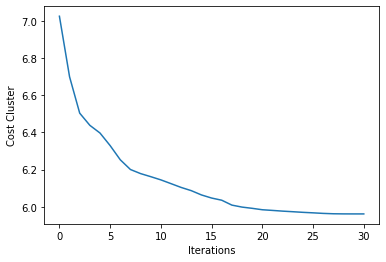

In [56]:
print('CHOOSING INITIAL REPRESENTATIVES AS RANDOM POINTS --> \n\n')

print('------------- Part A ----------------\n')
init_rep = np.random.uniform(size=(CLUSTER_CNT_K, train_x.shape[1]))

KMC = K_Means_Clustering(train_x, train_y, CLUSTER_CNT_K, init_rep)
KMC.train_dataset()
KMC.plot_representatives()

print('\n------------- Part B----------------\n')

print(f"Accuracy of the model is: {KMC.test_model(test_x, test_y)}\n")

KMC.plot_costs()

------------- Part C ----------------

Number of Clusters (k) = 5, Cost (J) = 6.531
Number of Clusters (k) = 6, Cost (J) = 6.4362
Number of Clusters (k) = 7, Cost (J) = 6.3498
Number of Clusters (k) = 8, Cost (J) = 6.2794
Number of Clusters (k) = 9, Cost (J) = 6.2513
Number of Clusters (k) = 10, Cost (J) = 6.217
Number of Clusters (k) = 11, Cost (J) = 6.1041
Number of Clusters (k) = 12, Cost (J) = 6.0878
Number of Clusters (k) = 13, Cost (J) = 6.1445
Number of Clusters (k) = 14, Cost (J) = 5.9733
Number of Clusters (k) = 15, Cost (J) = 6.0276
Number of Clusters (k) = 16, Cost (J) = 5.9913
Number of Clusters (k) = 17, Cost (J) = 5.9174
Number of Clusters (k) = 18, Cost (J) = 6.0089
Number of Clusters (k) = 19, Cost (J) = 5.92
Number of Clusters (k) = 20, Cost (J) = 5.877

Min Cost Clustering (J_min) = 5.877 for k = 20



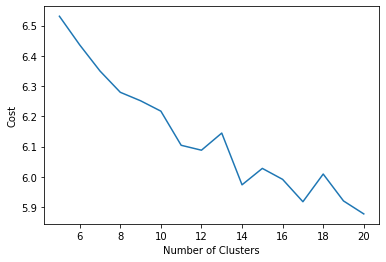

In [57]:
print('------------- Part C ----------------\n')

cost_k = np.zeros(16)
for k in range(5, 21):
  init_rep = np.random.uniform(size=(CLUSTER_CNT_K, train_x.shape[1]))
  KMC = K_Means_Clustering(train_x, train_y, k, init_rep)
  cost_k[k-5] = KMC.train_dataset(details=False)
  print(f"Number of Clusters (k) = {k}, Cost (J) = {round(cost_k[k-5], 4)}")

min_cost = np.min(cost_k)
k_min = np.argmin(cost_k) + 5
print(f"\nMin Cost Clustering (J_min) = {round(min_cost, 4)} for k = {k_min}\n")

plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.plot(range(5, 21), cost_k)
plt.show()

CHOOSING INITIAL REPRESENTATIVES FROM THE DATASET --> 


------------- Part A ----------------

Converged after 18 iterations.


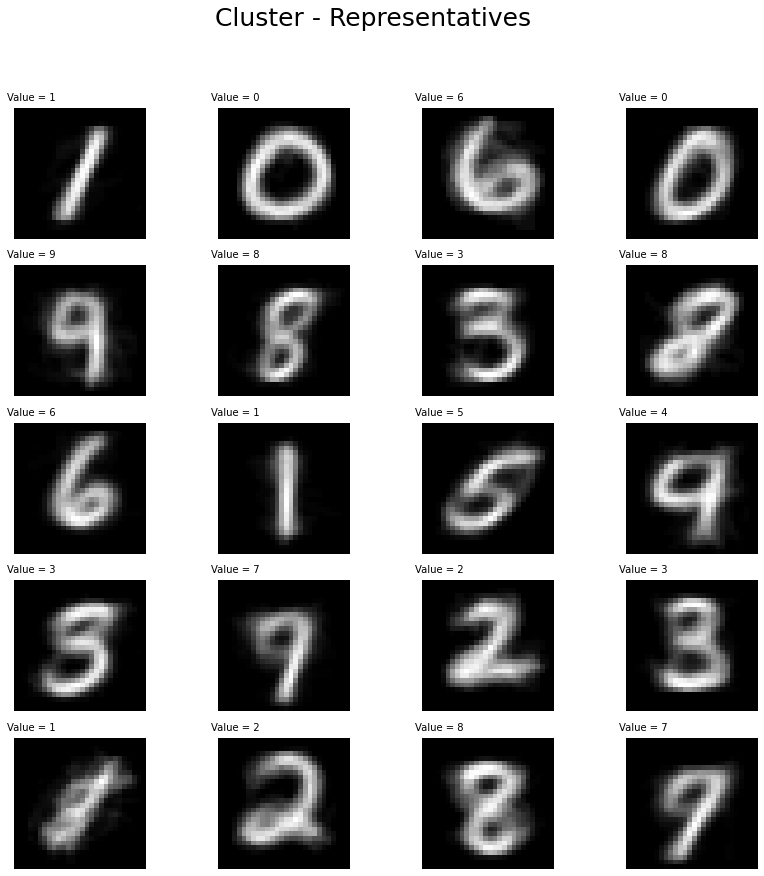


------------- Part B----------------

Accuracy of the model is: 0.66



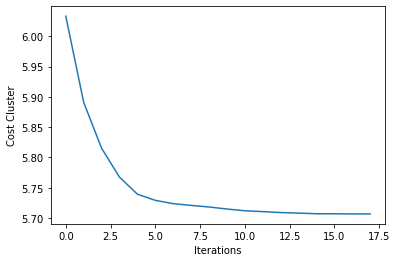

In [58]:
print('CHOOSING INITIAL REPRESENTATIVES FROM THE DATASET --> \n\n')

print('------------- Part A ----------------\n')
init_rep = train_x[:20]

KMC = K_Means_Clustering(train_x, train_y, CLUSTER_CNT_K, init_rep)
KMC.train_dataset()
KMC.plot_representatives()

print('\n------------- Part B----------------\n')

print(f"Accuracy of the model is: {KMC.test_model(test_x, test_y)}\n")
KMC.plot_costs()

------------- Part C ----------------

Number of Clusters (k) = 5, Cost (J) = 5.7068
Number of Clusters (k) = 6, Cost (J) = 6.1882
Number of Clusters (k) = 7, Cost (J) = 6.0863
Number of Clusters (k) = 8, Cost (J) = 6.0085
Number of Clusters (k) = 9, Cost (J) = 5.8766
Number of Clusters (k) = 10, Cost (J) = 5.7739
Number of Clusters (k) = 11, Cost (J) = 5.7156
Number of Clusters (k) = 12, Cost (J) = 5.6472
Number of Clusters (k) = 13, Cost (J) = 5.54
Number of Clusters (k) = 14, Cost (J) = 5.5302
Number of Clusters (k) = 15, Cost (J) = 5.3982
Number of Clusters (k) = 16, Cost (J) = 5.2512
Number of Clusters (k) = 17, Cost (J) = 5.1666
Number of Clusters (k) = 18, Cost (J) = 5.0568
Number of Clusters (k) = 19, Cost (J) = 4.9739
Number of Clusters (k) = 20, Cost (J) = 4.8301

Min Cost Clustering (J_min) = 4.8301 for k = 20



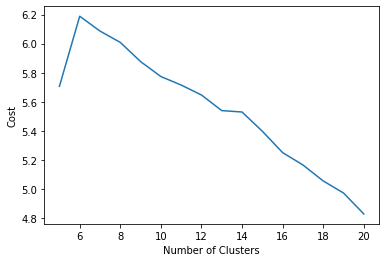

In [59]:
print('------------- Part C ----------------\n')

cost_k = np.zeros(16)
for k in range(5, 21):
  init_rep = train_x[(k-5)*20 : (k-4)*20]
  KMC = K_Means_Clustering(train_x, train_y, k, init_rep)
  cost_k[k-5] = KMC.train_dataset(details=False)
  print(f"Number of Clusters (k) = {k}, Cost (J) = {round(cost_k[k-5], 4)}")

min_cost = np.min(cost_k)
k_min = np.argmin(cost_k) + 5
print(f"\nMin Cost Clustering (J_min) = {round(min_cost, 4)} for k = {k_min}\n")

plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.plot(range(5, 21), cost_k)
plt.show()